# Visualize Type Performance between SNMT and UNMT

In [60]:
!./type-performance.sh | tr '\n' ' '

de-en 40.1 38.5 34.4 33.6 fr-en 44.6 41.6 34.7 33.6 ro-en 42.5 40.3 33.5 33.0 en-de 24.3 24.0 24.0 23.5 en-fr 33.3 31.9 28.0 27.3 en-ro 30.6 29.8 23.8 23.5 

In [62]:
!ls -1 */typeperf.{s,u}nmt.tsv.tc.macrof

ls: cannot access */typeperf.snmt.tsv.tc.macrof: No such file or directory
ls: cannot access */typeperf.unmt.tsv.tc.macrof: No such file or directory


In [77]:
!head de-en/typeperf.*nmt.tsv.mc.macrof

==> de-en/typeperf.snmt.tsv.mc.macrof <==
MacroF[β=1]+average.macro+case.mixed+ngram.1+numrefs.1+smooth.add-k.1+tok.13a+version.1.4.13 38.45 ( BP = 1.000 ratio = 1.005 hyp_len = 47921 ref_len = 47673)


----
Type           	Score	Refs	Preds	Match	F1	Precisn	Recall
the            	77.26	2160	2660	1862	77.26	70.00	86.20
.              	91.96	2054	2002	1865	91.96	93.16	90.80
,              	74.52	2017	2344	1625	74.52	69.33	80.57
to             	71.04	1219	1115	829	71.04	74.35	68.01
of             	68.98	1054	1251	795	68.98	63.55	75.43

==> de-en/typeperf.unmt.tsv.mc.macrof <==
MacroF[β=1]+average.macro+case.mixed+ngram.1+numrefs.1+smooth.add-k.1+tok.13a+version.1.4.13 33.60 ( BP = 1.000 ratio = 1.007 hyp_len = 48018 ref_len = 47673)


----
Type           	Score	Refs	Preds	Match	F1	Precisn	Recall
the            	78.14	2160	2685	1893	78.14	70.50	87.64
.              	91.57	2054	2133	1917	91.57	89.87	93.33
,              	77.94	2017	2109	1608	77.94	76.24	79.72
to             	70.58	1219	1113

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
print(pd.__version__)

1.1.4


In [2]:
pairs = list(Path('.').glob('*-en')) + list(Path('.').glob('en-*'))
pairs

[PosixPath('fr-en'),
 PosixPath('ro-en'),
 PosixPath('de-en'),
 PosixPath('en-fr'),
 PosixPath('en-de'),
 PosixPath('en-ro')]

In [3]:

def load_typeperf(path: Path):
    assert path.exists()
    lines = path.read_text(encoding='utf8').splitlines()
    assert lines[4].startswith('Type')     # header is here
    lines = lines[4:]
    recs = [l.split() for l in lines]
    def format(row):
        return [row[0], float(row[1])] + [int(c) for c in row[2:5]] +  [float(c) for c in row[5:]]
    columns = recs[0]
    data =  [format(r) for r in recs[1:]]
    df = pd.DataFrame(data=data, columns=columns)

    df['CumF1'] = df['F1'].cumsum() / (df.index +1)
    df['CumP'] = df['Precisn'].cumsum() / (df.index +1)
    df['CumR'] = df['Recall'].cumsum() / (df.index +1)    
    return df

path = pairs[0] / 'typeperf.snmt.tsv.mc.macrof'
recs = load_typeperf(path)
recs

,Type,Score,Refs,Preds,Match,F1,Precisn,Recall,CumF1,CumP,CumR
0,the,75.47,3777,4801,3237,75.47,67.42,85.70,75.470000,67.420000,85.700000
1,",",83.16,3376,3613,2906,83.16,80.43,86.08,79.315000,73.925000,85.890000
2,.,94.01,2929,3062,2816,94.01,91.97,96.14,84.213333,79.940000,89.306667
3,of,65.73,1970,2886,1596,65.73,55.30,81.02,79.592500,73.780000,87.235000
4,to,71.38,1738,1840,1277,71.38,69.40,73.48,77.950000,72.904000,84.484000
...,...,...,...,...,...,...,...,...,...,...,...
13203,containment,0.00,0,1,0,0.00,0.00,100.00,41.632555,66.802701,61.402319
13204,barcode,0.00,0,1,0,0.00,0.00,100.00,41.629402,66.797643,61.405242
13205,gaping,0.00,0,1,0,0.00,0.00,100.00,41.626250,66.792584,61.408164
13206,Monster,0.00,0,1,0,0.00,0.00,100.00,41.623098,66.787527,61.411087


In [4]:
#def viz_pair(pair):
pair = pairs[0] 
snmt = pair / 'typeperf.snmt.tsv.mc.macrof'
unmt = pair / 'typeperf.unmt.tsv.mc.macrof'
snmt = load_typeperf(snmt)
unmt = load_typeperf(unmt)

(-950.904, 13867.35, -5.0, 105.0)

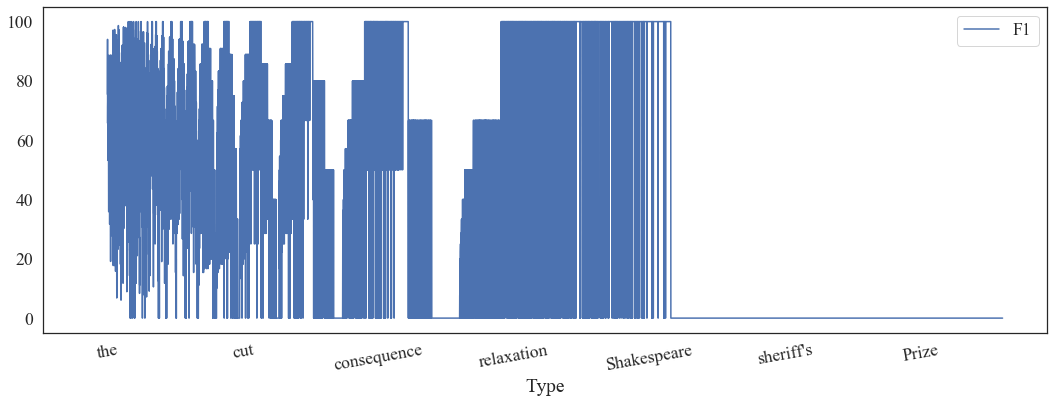

In [5]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
snmt.plot(x='Type', y=['F1'], logy=False, figsize=(18, 6))
x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.xticks(rotation=10)
plt.axis((x0 - margin_x, x1, y0, y1))

In [6]:
# Refs column is same; drop the dupe
combo = snmt.merge(right=unmt.drop(columns=['Refs']), on='Type', how='inner', suffixes=('_SNMT', '_UNMT'))
combo = combo.sort_values(by=['Refs'], ascending=False).reset_index(drop=True)
#combo['myindex'] =  pd.Series(range(1, len(combo) +1))
#combo.set_index('my_index')
for inp, out in  [('F1', 'CumF1'), ('Precisn', 'CumP'), ('Recall', 'CumR')]:
    for suff in ['_SNMT', '_UNMT']:
        combo[f'{out}{suff}'] = combo[f'{inp}{suff}'].cumsum() / (1+combo.index)
combo

,Type,Score_SNMT,Refs,Preds_SNMT,Match_SNMT,F1_SNMT,Precisn_SNMT,Recall_SNMT,CumF1_SNMT,CumP_SNMT,CumR_SNMT,Score_UNMT,Preds_UNMT,Match_UNMT,F1_UNMT,Precisn_UNMT,Recall_UNMT,CumF1_UNMT,CumP_UNMT,CumR_UNMT
0,the,75.47,3777,4801,3237,75.47,67.42,85.70,75.470000,67.420000,85.700000,77.43,3882,2965,77.43,76.38,78.50,77.430000,76.380000,78.500000
1,",",83.16,3376,3613,2906,83.16,80.43,86.08,79.315000,73.925000,85.890000,83.28,3584,2898,83.28,80.86,85.84,80.355000,78.620000,82.170000
2,.,94.01,2929,3062,2816,94.01,91.97,96.14,84.213333,79.940000,89.306667,93.91,3132,2846,93.91,90.87,97.17,84.873333,82.703333,87.170000
3,of,65.73,1970,2886,1596,65.73,55.30,81.02,79.592500,73.780000,87.235000,69.08,1979,1364,69.08,68.92,69.24,80.925000,79.257500,82.687500
4,to,71.38,1738,1840,1277,71.38,69.40,73.48,77.950000,72.904000,84.484000,72.23,1859,1299,72.23,69.88,74.74,79.186000,77.382000,81.098000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11581,negotiate,0.00,0,1,0,0.00,0.00,100.00,47.462982,76.158079,55.996911,0.00,1,0,0.00,0.00,100.00,41.126784,76.186533,49.368044
11582,protester,0.00,0,1,0,0.00,0.00,100.00,47.458885,76.151504,56.000710,0.00,1,0,0.00,0.00,100.00,41.123233,76.179956,49.372416
11583,reportedly,0.00,0,1,0,0.00,0.00,100.00,47.454788,76.144930,56.004508,0.00,2,0,0.00,0.00,100.00,41.119683,76.173380,49.376786
11584,Alerted,0.00,0,1,0,0.00,0.00,100.00,47.450691,76.138357,56.008306,0.00,1,0,0.00,0.00,100.00,41.116134,76.166804,49.381156


/Users/tg/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(-369.29223352674154, 18496.554652264633, 37.96348756343108, 87.1071355128525)

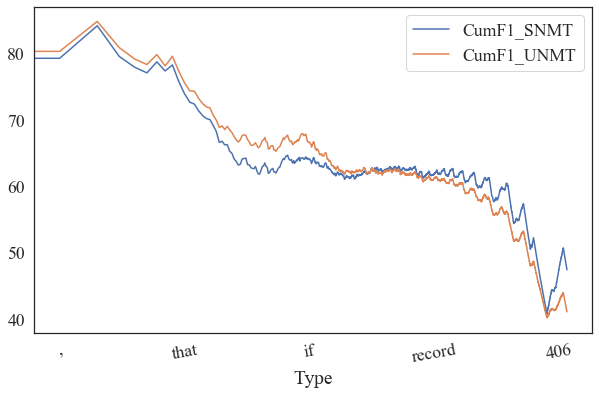

In [7]:
sns.set(font="Times New Roman", style='white',font_scale=1.6)
#combo[3460:3480].plot(x='Type', y=['Refs', 'CumF1_s', 'CumF1_u'], logy=False, figsize=(10, 6), kind='line')
combo[:].plot(x='Type', y=['CumF1_SNMT', 'CumF1_UNMT'], logx=True, figsize=(10, 6), kind='line')
x0, x1, y0, y1 = plt.axis()
margin_x = 0.02 * (x1- x0)
plt.xticks(rotation=10)
plt.axis((x0 - margin_x, x1, y0, y1))

----

All in one function

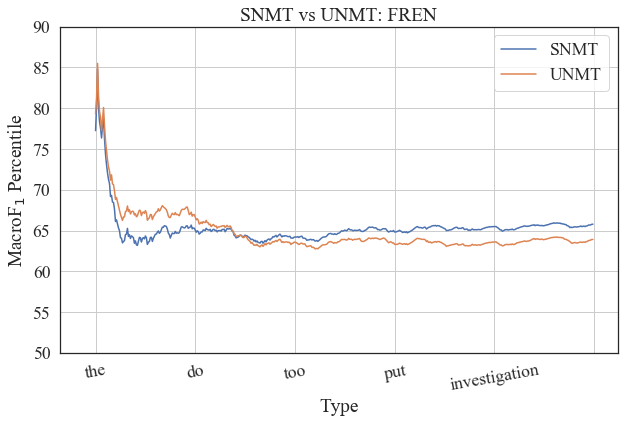

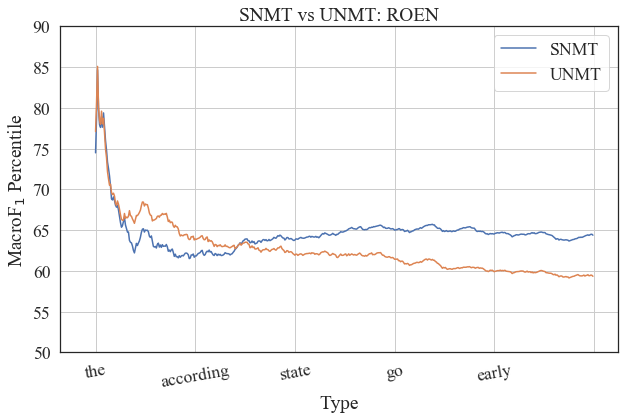

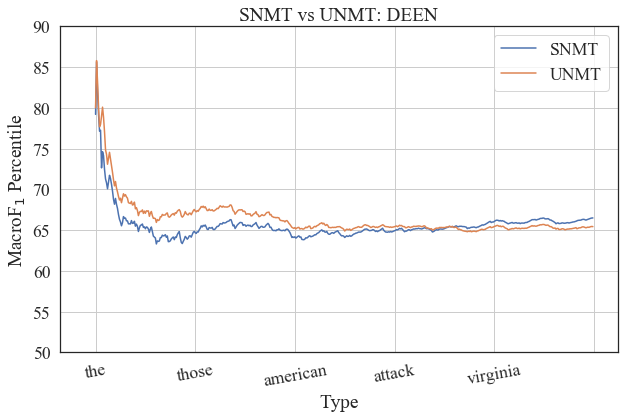

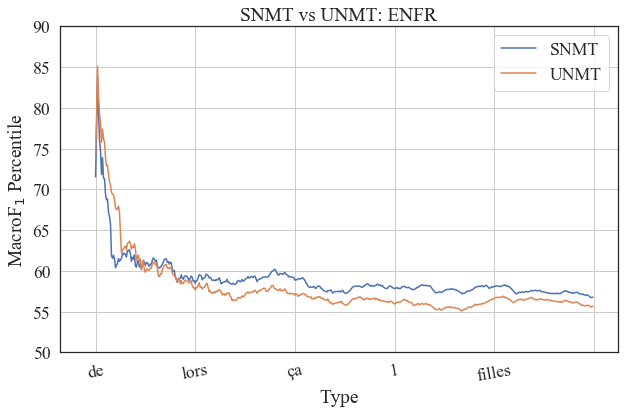

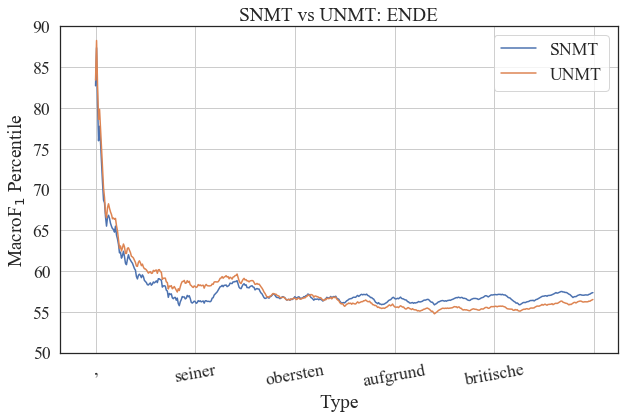

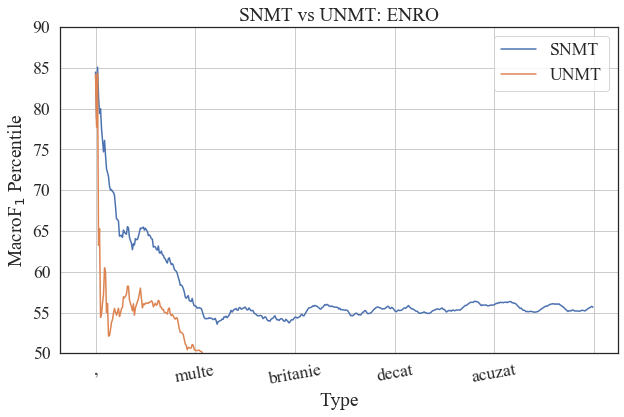

In [16]:
def viz_pair(pair: Path, title, filename=None, figsize=(10, 6), ylim=(50, 90)):
    snmt = pair / 'typeperf.snmt.tsv.lc.macrof'
    unmt = pair / 'typeperf.unmt.tsv.lc.macrof'
    snmt = load_typeperf(snmt)
    unmt = load_typeperf(unmt)
    combo = snmt.merge(right=unmt.drop(columns=['Refs']), on='Type', how='inner', suffixes=('_SNMT', '_UNMT'))
    combo = combo.sort_values(by=['Refs'], ascending=False).reset_index(drop=True)
    for inp, out in  [('F1', 'CumMacroF1'), ('Precisn', 'CumMacroP'), ('Recall', 'CumMacroR')]:
        for suff in ['_SNMT', '_UNMT']:
            combo[f'{out}{suff}'] = combo[f'{inp}{suff}'].cumsum() / (1+combo.index)
    sns.set(font="Times New Roman", style='white',font_scale=1.6)
    y_columns = ['CumMacroF1_SNMT', 'CumMacroF1_UNMT']
    y_names = ['SNMT', 'UNMT']
    ax = combo[:500].plot(x='Type', y=y_columns, title=title, grid=True, 
                          ylabel='MacroF$_1$ Percentile', xlabel='Type',
                     logx=False, ylim=ylim, figsize=figsize, kind='line')
    x0, x1, y0, y1 = plt.axis()
    margin_x = 0.02 * (x1- x0)
    plt.xticks(rotation=10)
    plt.axis((x0 - margin_x, x1, y0, y1))
    if y_names:
        ax.legend(y_names)
    if filename:
        plt.savefig(filename)

for pair in pairs:
    title = 'SNMT vs UNMT: ' + str(pair).replace('-', '').upper()
    filename = f'viz/s_unmt-{str(pair).replace("-", "")}-maf1.pdf'
    viz_pair(pair, title=title, filename=filename)

In [4]:
pip install 'pandas >=1.1'

     |████████████████████████████████| 9.9 MB 3.1 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.0
    Uninstalling pandas-1.0.0:
      Successfully uninstalled pandas-1.0.0
Note: you may need to restart the kernel to use updated packages.


In [86]:
sub = combo
for meas in ['F1', 'Precisn', 'Recall']:
    for i in [1, 10, 100, 500, 1000, 5000, len(sub)]:
        print(meas, '%4d' % i, '%.2f' % sub[:i][f'{meas}_s'].mean(), '%.2f' % sub[:i][f'{meas}_u'].mean())

F1    1 77.26 78.14
F1   10 72.11 76.74
F1  100 64.70 66.61
F1  500 64.63 64.46
F1 1000 63.37 62.93
F1 5000 51.04 47.34
F1 8726 45.54 41.91
Precisn    1 70.00 70.50
Precisn   10 72.79 73.75
Precisn  100 67.50 67.72
Precisn  500 69.00 67.57
Precisn 1000 70.84 68.55
Precisn 5000 79.11 78.05
Precisn 8726 79.03 79.10
Recall    1 86.20 87.64
Recall   10 74.59 80.30
Recall  100 65.18 66.40
Recall  500 65.37 64.76
Recall 1000 63.66 63.01
Recall 5000 52.10 48.33
Recall 8726 52.31 48.35


In [91]:
for _, row in snmt.iterrows():
    print(row)
    print(row['Type'])
    break

Type         the
Score      77.26
Refs        2160
Preds       2660
Match       1862
F1         77.26
Precisn       70
Recall      86.2
Name: 0, dtype: object
the


In [97]:
snmt['F1'].cumsum() / (snmt.index +1)

0        77.260000
1        84.610000
2        81.246667
3        78.695000
4        76.752000
           ...    
10330    38.467166
10331    38.463443
10332    38.459720
10333    38.455999
10334    38.452278
Length: 10335, dtype: float64

In [98]:
unmt['F1'].cumsum() / (unmt.index +1)

0        78.140000
1        84.855000
2        82.550000
3        79.557500
4        77.276000
           ...    
10878    33.615639
10879    33.612550
10880    33.609461
10881    33.606372
10882    33.603284
Length: 10883, dtype: float64